### Simulation du mouvement Brownien sur une sphère $S^2$ :

100%|██████████| 100/100 [01:02<00:00,  1.61it/s]
<ipython-input-1-1ba5a0463883>:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join('Animation', filename))


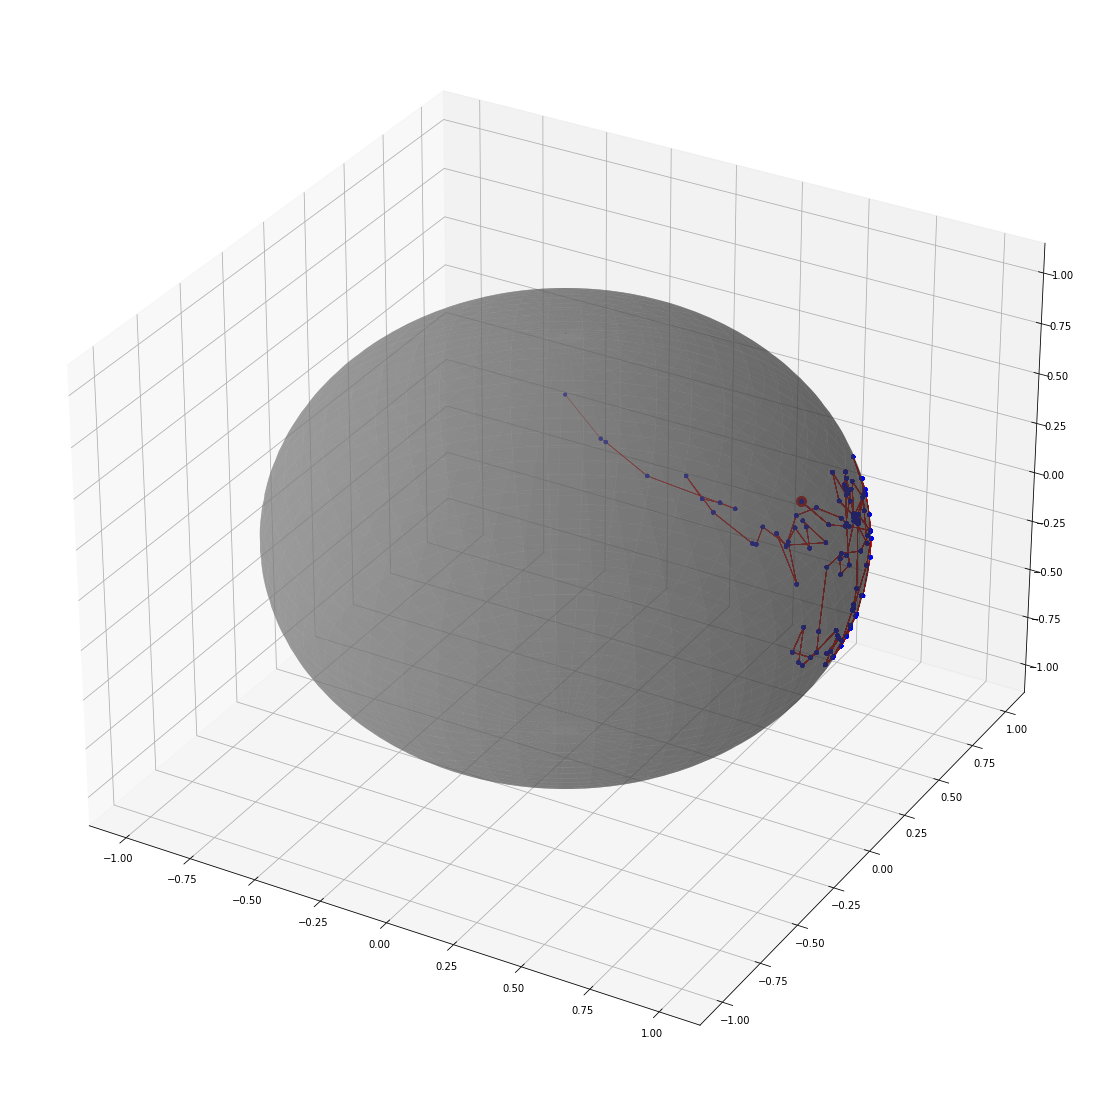

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os 
import imageio
from tqdm import tqdm

if not os.path.exists('Animation'):
    os.mkdir('Animation')

# Définir les angles theta et rho
theta = np.linspace(0, np.pi, 100)
rho = np.linspace(0, 2 * np.pi, 100)

# Convertir les angles en coordonnées cartésiennes
x = np.outer(np.cos(rho), np.sin(theta))
y = np.outer(np.sin(rho), np.sin(theta))
z = np.outer(np.ones(np.size(theta)), np.cos(theta))

# Dessiner la sphère
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='gray', alpha=0.5)

# Ajouter un point sur la sphère
theta_point = np.pi / 3
rho_point = 2 * np.pi
x_point = np.sin(theta_point) * np.cos(rho_point)
y_point = np.sin(theta_point) * np.sin(rho_point)
z_point = np.cos(theta_point)
ax.scatter3D(x_point, y_point, z_point, color='r', alpha=1.0, s=100)

# Déplacement du point sur la variété
dt = 0.01
frames, filenames, num_steps = 2, [], 100
polar_coords = {'theta': [theta_point], 'rho': [rho_point]}
steps = {'x': [x_point], 'y': [y_point], 'z': [z_point]}

for i in tqdm(range(num_steps), position=0, leave=True):
    rand_multivariate = np.random.multivariate_normal(np.zeros(2), dt * np.eye(2))
    theta_point += 1 / 2 * theta_point * dt + rand_multivariate[0]
    rho_point += 1 / np.sin(theta_point) * rand_multivariate[1]

    # ajouter les nouvelles coordonnées polaires
    polar_coords['theta'].append(theta_point)
    polar_coords['rho'].append(rho_point)

    # Ajouter le nouveau point sur la sphère
    steps['x'].append(np.sin(theta_point) * np.cos(rho_point))
    steps['y'].append(np.sin(theta_point) * np.sin(rho_point))
    steps['z'].append(np.cos(theta_point))
    
    ax.scatter3D(steps['x'], steps['y'], steps['z'], color='b', alpha=1.0, s=10)
    ax.plot3D(steps['x'], steps['y'], steps['z'], 'red', linewidth=0.5)

    plt.savefig('Animation/step_{}.png'.format(i))
    filenames.extend(['step_{}.png'.format(i)] * frames)

with imageio.get_writer('Animation/animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(os.path.join('Animation', filename))
        writer.append_data(image)

for filename in os.listdir('Animation'):
    if filename.endswith('.png'):
        os.remove(os.path.join('Animation', filename))

# Afficher le graphique
plt.show()